In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE

In [37]:
df = pd.read_csv("./diabetes_binary_health_indicators_BRFSS2015.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

86.07

In [40]:
data = df.copy()

In [41]:
bins = [0, 18.5, 24.9, 29.9, 30]
cats = [f'({bins[i]},{bins[i+1]}]' for i in range(len(bins)-1)]
data["BMI"] = pd.cut(data["BMI"], bins=bins, labels=cats)

In [42]:
cat_attr = ["GenHlth", "MentHlth", "PhysHlth", "Age", "Education", "Income", "BMI"]

In [43]:
data_cat = data[cat_attr].copy()
data = data.drop(cat_attr, axis=1)

In [44]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
data_cat = pd.DataFrame(encoder.fit_transform(data_cat).toarray())

In [45]:
data = pd.concat([data_cat, data], axis=1)

In [46]:
data

,0,1,2,3,4,5,6,7,8,9,...,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,DiffWalk,Sex
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
253676,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
253677,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
253678,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [47]:
y = data[["Diabetes_binary"]].copy()
X = data.drop(["Diabetes_binary"], axis=1)

In [48]:
oversample = SMOTE()
X, y = oversample.fit_resample(np.array(X), np.array(y))

In [51]:
y.sum() / len(y)

0.5

In [14]:
from sklearn.model_selection import train_test_split

X_train_t, X_test, y_train_t, y_test = train_test_split(X, y,
                                                        test_size=0.15,
                                                        random_state=27,
                                                        stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                test_size=0.15,
                                                random_state=27,
                                                stratify=y)

In [50]:
# oversample = SMOTE()
# X_train, y_train = oversample.fit_resample(np.array(X_train), np.array(y_train))

In [15]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1])))
model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-12-16 10:10:17.398171: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-16 10:10:17.398820: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               11400     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 51,901
Trainable params: 51,901
Non-traina

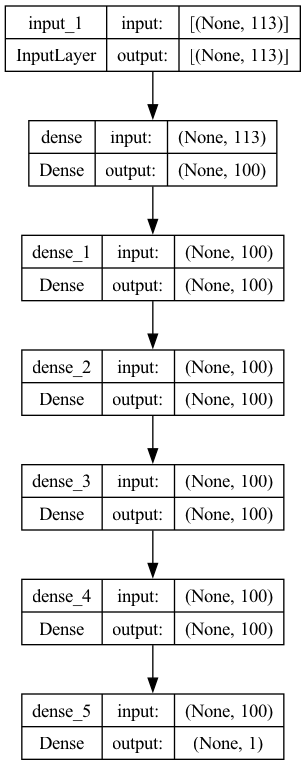

In [16]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.compile(optimizer='nadam',
              loss='binary_crossentropy',
              metrics='accuracy')

In [37]:
# from sklearn.utils import class_weight

# weights = class_weight.compute_class_weight(class_weight="balanced", classes=np.unique(y_train),
#                                                   y=y_train.values.reshape(-1))

In [38]:
# class_weight = {}
# classes = np.unique(y_train).tolist()
# for i in range(len(classes)):
#     class_weight[classes[i]] = weights[i]

In [39]:
# class_weight

{0.0: 0.580944477972239, 1.0: 3.588536812674744}

In [87]:
callback_es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("./my_keras_model.h5", monitor='val_loss', save_freq=1,
                                                    save_best_only=True)
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
# history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[callback_es, checkpoint_cb, lr_scheduler], class_weight=class_weight)
history = model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_val, y_val), callbacks=[callback_es, checkpoint_cb, lr_scheduler])

Epoch 1/100
11599/11599 [==============================] - 73s 6ms/step - loss: 0.4923 - accuracy: 0.7617 - val_loss: 0.4785 - val_accuracy: 0.7688 - lr: 0.0010
Epoch 2/100
   34/11599 [..............................] - ETA: 53s - loss: 0.4639 - accuracy: 0.7748

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11599/11599 [==============================] - 69s 6ms/step - loss: 0.4615 - accuracy: 0.7786 - val_loss: 0.4598 - val_accuracy: 0.7768 - lr: 0.0010
Epoch 3/100
11599/11599 [==============================] - 72s 6ms/step - loss: 0.4419 - accuracy: 0.7890 - val_loss: 0.4275 - val_accuracy: 0.7940 - lr: 0.0010
Epoch 4/100
11599/11599 [==============================] - 75s 6ms/step - loss: 0.4214 - accuracy: 0.7984 - val_loss: 0.4056 - val_accuracy: 0.8062 - lr: 0.0010
Epoch 5/100
11599/11599 [==============================] - 71s 6ms/step - loss: 0.3975 - accuracy: 0.8093 - val_loss: 0.3846 - val_accuracy: 0.8145 - lr: 0.0010
Epoch 6/100
11599/11599 [==============================] - 76s 7ms/step - loss: 0.3798 - accuracy: 0.8169 - val_loss: 0.3707 - val_accuracy: 0.8218 - lr: 0.0010
Epoch 7/100
11599/11599 [==============================] - 71s 6ms/step - loss: 0.3679 - accuracy: 0.8223 - val_loss: 0.3673 - val_accuracy: 0.8224 - lr: 0.0010
Epoch 8/100
11599/11599 [=====================

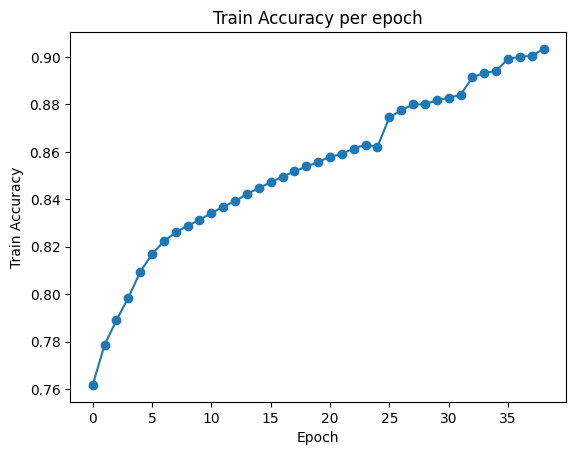

In [88]:
plt.plot(history.history["accuracy"])
plt.scatter(range(len(history.history["accuracy"])), history.history["accuracy"])
plt.title("Train Accuracy per epoch")
plt.ylabel("Train Accuracy")
plt.xlabel("Epoch")
plt.show()

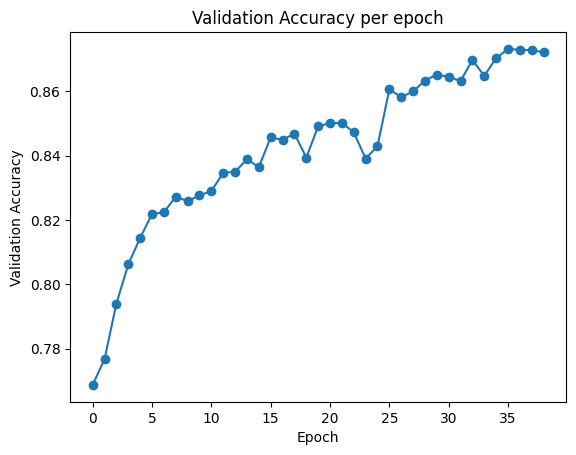

In [89]:
plt.plot(history.history["val_accuracy"])
plt.scatter(range(len(history.history["val_accuracy"])), history.history["val_accuracy"])
plt.title("Validation Accuracy per epoch")
plt.ylabel("Validation Accuracy")
plt.xlabel("Epoch")
plt.show()

In [93]:
model.load_weights("./my_keras_model.h5")

In [67]:
model

In [94]:
model.evaluate(X_test, y_test)

2047/2047 [==============================] - 5s 2ms/step - loss: 0.3029 - accuracy: 0.8633


[0.30288398265838623, 0.8633303046226501]

In [95]:
y_test.sum(axis=0)/ len(y_test)

0.5000076334712447

In [96]:
from sklearn.metrics import precision_recall_fscore_support

y_pred = model.predict(X_test)
precision_recall_fscore_support(y_test, y_pred > 0.5)

2047/2047 [==============================] - 4s 2ms/step


(array([0.84178779, 0.88777007]),
 array([0.89483969, 0.83182193]),
 array([0.8675034 , 0.85888584]),
 array([32750, 32751]))

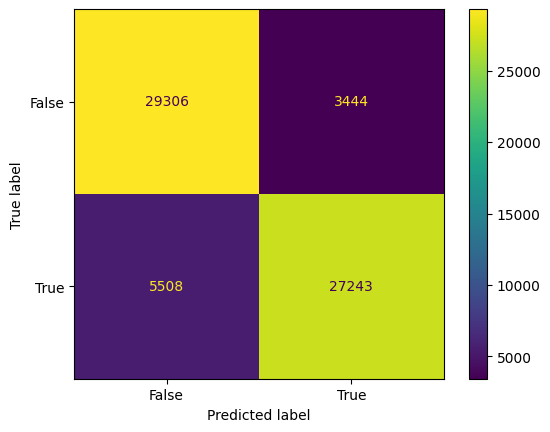

In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix = confusion_matrix(y_test, y_pred > 0.5)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [18]:
model.load_weights("./my_keras_model.h5")

In [19]:
import test_shape

In [24]:
def f(X):
    return model.predict(X).flatten()

In [33]:
test_shape.initjs()

In [34]:
explainer = test_shape.KernelExplainer(f, X_train[:50, :])
shap_values = explainer.shap_values(X_test[299, :], nsamples=500)
test_shape.force_plot(explainer.expected_value, shap_values[0], X_test[299, :])

782/782 [==============================] - 5s 6ms/step


In [30]:
X_test.shape

(65501, 113)

In [28]:
shap_values = explainer.shap_values(X_test)

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:GPU:0}} In[0] and In[1] has different ndims: [65,2194] vs. [2194] [Op:MatMul]